*Author: Priya Chaurasiya*

**GRIP - The Sparks Foundation**

Data Science and Business Analytics Internship

Task-1: Prediction using Supervised ML

In this task we've to predict the percentage of a student based on the number of study hours using **Simple Linear Regression**. The task has 2 variables where the *feature* is *number of study hours* and *target value* is *percentage score.*

Importing the Dependencies:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Loading the data into Pandas dataframe:

In [2]:
df = pd.read_csv('http://bit.ly/w-data')

**Data Preprocessing and Analysis:**

In [3]:
#printing the first five rows of the dataset:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#printing the last five rows of the dataset:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


As we can see from the above results, there are only 2 columns in our dataset i.e. Hours and Scores.

In [5]:
#getting the number of rows and columns in the dataset:
df.shape

(25, 2)

In our dataseet, there are 25 rows and 2 columns.

In [6]:
#getting information about dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
#checking the number of missing values in each columns:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

As we can see there is no missing values in our dataset. If we have missing values then we'll have to handle those missing values by dropping them or by replacing them with some other values like mean, median.This method is known as imputation. Here we can't drop the values as there is very less data.

In [8]:
#getting all the statistical measures about the dataset:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Data Visualisation:**

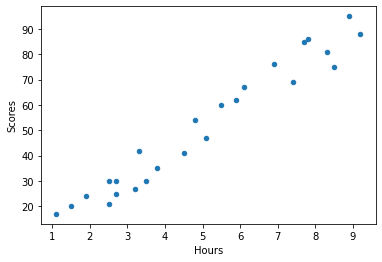

In [9]:
df.plot(kind='scatter', x='Hours', y='Scores')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


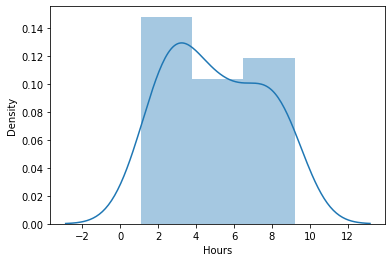

In [10]:
#distribution plot for hours columns
hours = df['Hours']
sns.distplot(hours)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


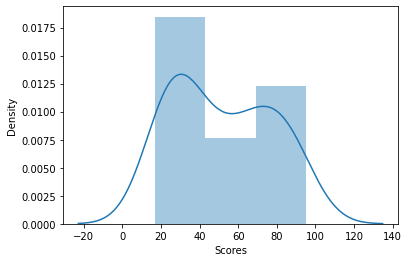

In [11]:
scores = df['Scores']
sns.distplot(scores)

*Correlation*: 

--> It explains how one or more variables are related to each other. 

--> These variables can be input data features which have been used to forecast our target variable. 

--> Correlation, statistical technique which determines how one variables moves/changes in relation with the other variable.

In [12]:
correlation = df.corr()
correlation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


For observing the correlation on the graph we use Heat Map.

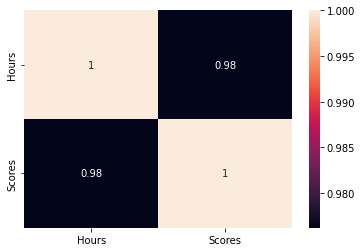

In [13]:
sns.heatmap(correlation, annot=True)

The graph shows that a student who studies for longer period of time will get more marks and vice versa. 

Separating the features and target columns. 

In [14]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, 1].values

In [15]:
print(X)
print(Y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [16]:
#checking the shape of X and Y:
print(X.shape, Y.shape)

(25, 1) (25,)


*Splitting the data into train and test data:*

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(25, 1) (20, 1) (5, 1)


*Model Training:*

In [19]:
#Loading an instance of the model to use:
model = LinearRegression()

In [20]:
#training the model:
model.fit(X_train, Y_train)

LinearRegression()

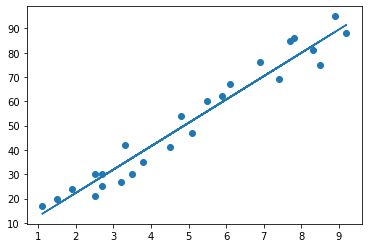

In [21]:
m = model.coef_
c = model.intercept_
line = m*X + c
plt.scatter(X, Y)
plt.plot(X, line)
plt.show()

In [22]:
#predictions using our model:
Y_pred = model.predict(X_test)

In [23]:
actual_predicted = pd.DataFrame({'Target(Scores)':Y_test,'Predicted(Scores)':Y_pred})
actual_predicted

,Target(Scores),Predicted(Scores)
0,69,74.174939
1,67,61.688457
2,27,33.833997
3,85,77.056435
4,54,49.201975


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


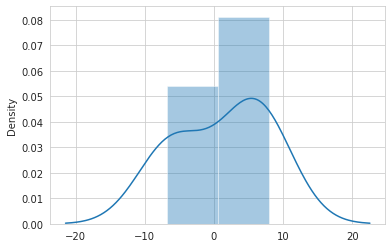

In [24]:
sns.set_style('whitegrid')
sns.distplot(np.array(Y_test-Y_pred))
plt.show()

What will be predicted scores if a student studies for 9.25 hrs/day ?

In [25]:
h = 9.25
s = model.predict([[h]])
print("If a student studies for {} hrs/day, he/she will score {}% in exam!".format(h,s[0]))

If a student studies for 9.25 hrs/day, he/she will score 91.94416404722054% in exam!


*Model Evaluation:*

In [26]:
from sklearn import metrics
from sklearn.metrics import r2_score
print(" Mean Absolute Error :: ", metrics.mean_absolute_error(Y_test, Y_pred))
print(" R2 score :: ",r2_score(Y_test, Y_pred) )

 Mean Absolute Error ::  6.0124137623905725
 R2 score ::  0.9000546706590143
